# Project: Plant Seedlings Classicication.

### Data Description:

- You are provided with a dataset of images of plant seedlings at various stages of grown.
- Each image has a filename that is its unique id.
- The dataset comprises 12 plant species.
- The goal of the project is to create a classifier capable of determining a plant's species from a photo.

### Dataset:

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Label.csv
- The original files are from Kaggle. Due to the large volume of data, the images were converted to images.npy file and the labels are also put into the Labels.csv. So that you can work on the data/project seamlessly without worrying about the high data volume.
- Link to the Kaggle project site: https://www.kaggle.com/c/plant-seedlings-classification/data?select=train

**Note: For project purposes, download the data provided on Olympus**


### Context:

- Can you differentiate a weed from a crop seedling?
- The ability to do so effectively can mean better crop yields and better stewardship of the environment.
- The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stages.

### Objective:

- To implement the techniques learnt as a part of the course.

### Learning Outcomes:
- Pre-processing of image data.
- Visualization of images.
- Building CNN.
- Evaluate the Model.

In [19]:
??cv2.BORDER_DEFAULT

In [ ]:
cv2.GaussianBlur()

In [1]:
SEED=123

In [17]:
# Import necessary libraries.
import cv2
import math
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

In [3]:
FILE_PATH="images.npy"
LABELS_PATH="Labels.csv"

In [4]:
data = np.random.random(size=(100000,100))
data_df = pd.DataFrame(data)

In [5]:
%%time
np.save("data.npy", data)

CPU times: user 7.18 ms, sys: 150 ms, total: 158 ms
Wall time: 170 ms


In [6]:
%%time
data_df.to_csv("data.csv", index=False)

CPU times: user 13.7 s, sys: 447 ms, total: 14.1 s
Wall time: 14.3 s


In [8]:
!ls -lth

total 1615088
-rw-r--r--@ 1 vinodgattani  staff   1.1M Feb 14 21:08 023_01_case_study.ipynb
-rw-r--r--  1 vinodgattani  staff   184M Feb 14 21:07 data.csv
-rw-r--r--  1 vinodgattani  staff    76M Feb 14 21:07 data.npy
-rw-r--r--@ 1 vinodgattani  staff   226K Feb 13 13:29 5.3_using_a_pretrained_convnet.ipynb
-rw-r--r--  1 vinodgattani  staff   6.7M Feb 13 13:29 5.4-visualizing-what-convnets-learn.ipynb
-rw-r--r--  1 vinodgattani  staff    58K Nov  7 19:55 model.png
-rw-r--r--  1 vinodgattani  staff     0B Nov  7 19:44 untitled.txt
-rw-r--r--  1 vinodgattani  staff   184M Nov  7 19:30 data_df1.csv
-rw-r--r--  1 vinodgattani  staff    86M Nov  7 19:30 data_df1.npy
-rw-r--r--@ 1 vinodgattani  staff   499K Nov  7 17:14 Project Solution - Plant Seedlings Image Classification_1.ipynb
-rw-r--r--@ 1 vinodgattani  staff   223M Nov  6 16:32 images.npy
-rw-r--r--@ 1 vinodgattani  staff    67K Nov  6 16:16 Labels.csv
-rw-r--r--@ 1 vinodgattani  staff   519K Nov  6 16:16 Problem Statement - Plant Se

In [9]:
%%time
data_loaded = np.load("data.npy")

CPU times: user 1.22 ms, sys: 66.6 ms, total: 67.9 ms
Wall time: 71.1 ms


In [10]:
%%time
data_df_loaded = pd.read_csv("data.csv")

CPU times: user 1.64 s, sys: 195 ms, total: 1.83 s
Wall time: 1.86 s


In [11]:
data_df['str_col1'] = "Vinod"

In [12]:
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,str_col1
0,0.396969,0.593832,0.874981,0.415888,0.584105,0.841171,0.681739,0.307129,0.933643,0.799968,...,0.506323,0.890723,0.999413,0.806893,0.716113,0.609983,0.152423,0.013363,0.344052,Vinod
1,0.243606,0.963891,0.947692,0.395418,0.520865,0.084081,0.049121,0.964302,0.560580,0.253059,...,0.863006,0.039267,0.458926,0.905297,0.439484,0.980233,0.677058,0.225647,0.603849,Vinod
2,0.212339,0.603431,0.187144,0.776481,0.375513,0.106177,0.067051,0.523256,0.752125,0.906125,...,0.430746,0.324277,0.877582,0.929250,0.212404,0.015813,0.942121,0.275051,0.404996,Vinod
3,0.678248,0.310407,0.362929,0.397782,0.519277,0.310677,0.636829,0.709304,0.377335,0.185164,...,0.449855,0.297748,0.706821,0.390560,0.045477,0.873843,0.366421,0.039203,0.000495,Vinod
4,0.531123,0.403912,0.748243,0.299112,0.270036,0.834323,0.421217,0.306772,0.026300,0.402077,...,0.593489,0.850053,0.113399,0.160923,0.993294,0.946242,0.361883,0.453130,0.973737,Vinod


In [13]:
type(data_df)

pandas.core.frame.DataFrame

In [14]:
data_df1 = data_df.values
type(data_df1)

numpy.ndarray

In [15]:
%%time
np.save("data_df1.npy", data_df1)

CPU times: user 336 ms, sys: 116 ms, total: 452 ms
Wall time: 500 ms


In [16]:
%%time
data_df.to_csv("data_df1.csv", index=False)

CPU times: user 13.7 s, sys: 455 ms, total: 14.2 s
Wall time: 14.4 s


In [ ]:
cv2.Defa

In [14]:
# Load the image file of dataset
images = np.load(FILE_PATH)

# Load the labels file of dataset
#labels = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/plant_seedlings_numpy/')
labels = pd.read_csv(LABELS_PATH)

In [15]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


In [16]:
labels['Label'].value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
Name: Label, dtype: int64

In [17]:
labels['Label'].value_counts(normalize=True)

Loose Silky-bent             0.137684
Common Chickweed             0.128632
Scentless Mayweed            0.108632
Small-flowered Cranesbill    0.104421
Fat Hen                      0.100000
Charlock                     0.082105
Sugar beet                   0.081053
Cleavers                     0.060421
Black-grass                  0.055368
Shepherds Purse              0.048632
Maize                        0.046526
Common wheat                 0.046526
Name: Label, dtype: float64

In [18]:
species = labels['Label'].unique()
len(species)

12

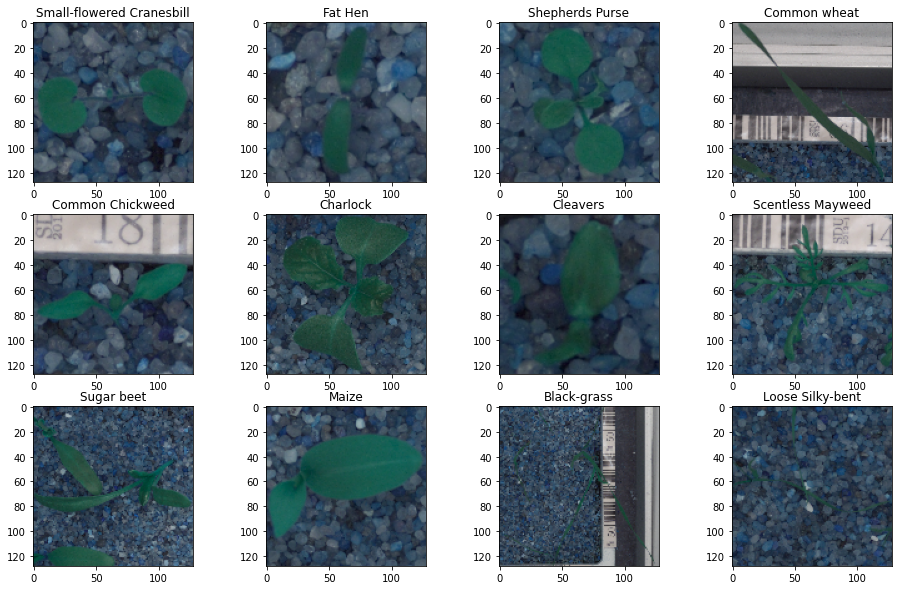

In [20]:
# Show some example images
plt.figure(figsize=(16,10))
for i, s in enumerate(species):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[labels[labels['Label']==s].head(10).index[0]])
    plt.title(s)

# Apply image processing on the images:

- Gaussian Blurring.
- Normalization.
- Visualize data after pre-processing.

#### Why would anybody in their right mind apply blurring filters to their image?

1. Every image is associated with noise. Noise is the pixel brightening because ofthe dark current i.e. the current generated not by the photons but othermechanisms
2. These unwanted specks of brightness can hamper the processing down the line
3. Like in any conventional algorithms, we do not want our models to get influencedby noise!
4. The gaussian blurring and other filters act like erasers on the noisy pixels by re-calculating their pixel values based on neighbor pixels!
5. Hopefully, after this step, the digital image will have only the object of interest(the real signal or function) that we wish to work onImage processing (Gaussian Blurring)Proprietary content


In [21]:
#plt.figure(figsize=(16,10))

preprocessed_images = []       # Initialize empty list to store the images after pre-processing.

for img in images:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)
    preprocessed_images.append(blurImg)# Append image 
    
    # Show examples

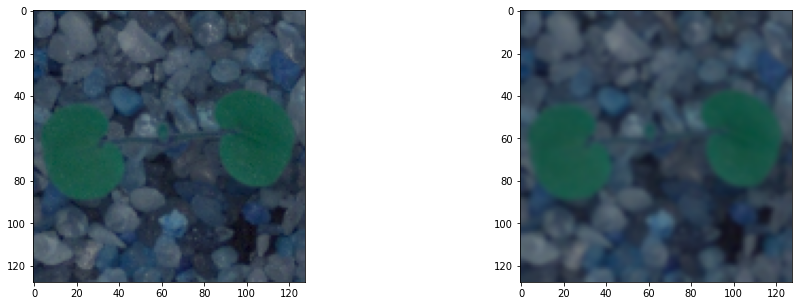

In [22]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1); plt.imshow(images[0])         # Show the original image
plt.subplot(1, 2, 2); plt.imshow(preprocessed_images[0])     # Blur image

In [23]:
preprocessed_images = np.asarray(preprocessed_images)    # Convert to numpy array.

In [24]:
len(preprocessed_images), len(images)

(4750, 4750)

In [25]:
preprocessed_images[0].shape, images[0].shape

((128, 128, 3), (128, 128, 3))

In [26]:
# Normalize image data.
preprocessed_images = preprocessed_images / 255

In [27]:
images = images / 255

# Make data compatible:

- Convert labels from digits to one hot vectors.
- Print the label for y_train[0].
- Check the shape of data, Reshape data into shapes compatible with Keras models, if already not compatible.


In [28]:
labels

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
...,...
4745,Loose Silky-bent
4746,Loose Silky-bent
4747,Loose Silky-bent
4748,Loose Silky-bent


In [29]:
# Convert labels from digits to one hot vectors.

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(labels)


In [30]:
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(preprocessed_images, y, test_size=0.3, random_state=SEED)
X_train_org, X_test_org, y_train, y_test = train_test_split(images, y, test_size=0.3, random_state=SEED)


In [32]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3325, 128, 128, 3)
(3325, 12)
(1425, 128, 128, 3)
(1425, 12)


In [33]:
# Reshape data into shapes compatible with Keras models.

X_train = X_train.reshape(X_train.shape[0], 128, 128, 3)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 3)
X_train_org = X_train.reshape(X_train_org.shape[0], 128, 128, 3)
X_test_org = X_test.reshape(X_test_org.shape[0], 128, 128, 3)

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_train_org.shape)
print(X_test_org.shape)

(3325, 128, 128, 3)
(3325, 12)
(1425, 128, 128, 3)
(1425, 12)
(3325, 128, 128, 3)
(1425, 128, 128, 3)


So, we can see above that the data was already compatible with Keras, as the shape of data before and after reshaping is same.

# Building CNN:

- Define layers.
- Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy)

In [35]:
def architecture_1():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=(128, 128, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.GlobalMaxPooling2D())
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(12, activation="softmax"))
    
    return model

def architecture_2():
    model = models.Sequential()

    model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=(128, 128, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.GlobalMaxPooling2D())
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(12, activation="softmax"))

    
    return model

def architecture_3():
    model = models.Sequential()

    model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=(128, 128, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.GlobalMaxPooling2D())
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(12, activation="softmax"))

    return model


def architecture_4():
    model = models.Sequential()

    model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=(128, 128, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(128, (3, 3), padding='same', activation="relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.GlobalMaxPooling2D())
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(12, activation="softmax"))

    return model



In [39]:
import tensorflow as tf

In [40]:
model = architecture_1()

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
global_max_pooling2d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               8448      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                3

In [41]:
l = model.layers

In [42]:
l

In [43]:
l[0].trainable

True

In [47]:
l[0].name

'conv2d_1'

In [48]:
l[0].weights

[<tf.Variable 'conv2d_1/kernel:0' shape=(5, 5, 3, 32) dtype=float32, numpy=
 array([[[[-0.04277556, -0.04552223, -0.06166461, ...,  0.04691078,
           -0.03843175,  0.03785259],
          [ 0.0400073 , -0.05280027, -0.03910061, ...,  0.0356155 ,
            0.02789136,  0.03528532],
          [-0.01518913,  0.05062643, -0.03872486, ...,  0.00432769,
            0.0592013 ,  0.04522814]],
 
         [[-0.02471036,  0.02436023, -0.04169974, ...,  0.00957365,
            0.04248039,  0.00177635],
          [-0.0821678 , -0.00873049, -0.00013826, ...,  0.01237477,
            0.01906885, -0.02941275],
          [-0.00792179,  0.01671097, -0.0398645 , ...,  0.01919688,
           -0.01339424,  0.07736517]],
 
         [[-0.03076427, -0.02452193,  0.06500821, ..., -0.00903749,
           -0.05448685, -0.07485741],
          [-0.02022557,  0.02977519,  0.04200868, ..., -0.06992067,
            0.02202978, -0.041768  ],
          [ 0.00954006,  0.02198558,  0.06129497, ...,  0.0697248 ,
  

In [45]:
l[0].trainable = False

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               8448      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 12)               

### Model Architecture

In [ ]:
model.summary()

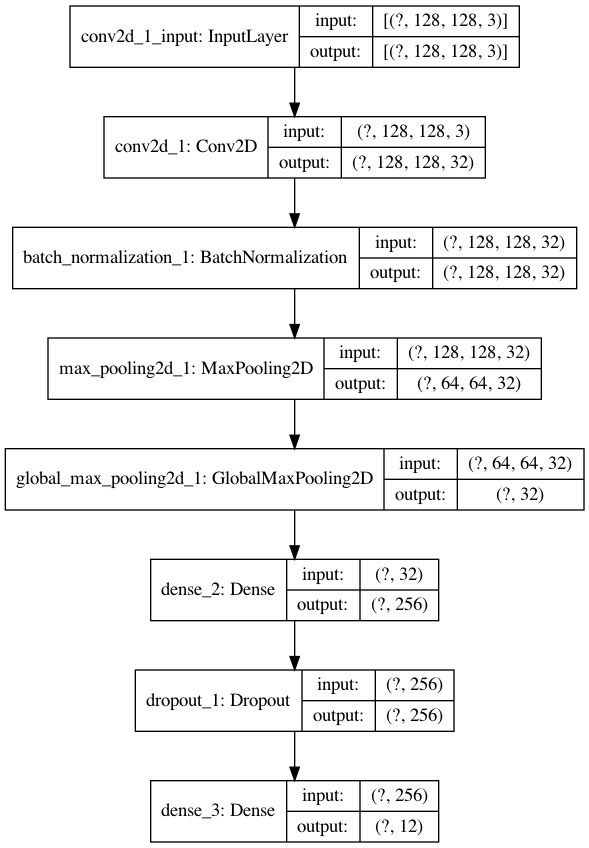

In [49]:
tf.keras.utils.plot_model(
    model, to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
)

In [ ]:
# Set the optimizer and loss function, and compile the model with them.

optimizer = tf.keras.optimizers.Adam(
                  learning_rate=0.001,
                  beta_1=0.9,
                  beta_2=0.999,
                  epsilon=1e-07,
                  amsgrad=False,
                  name='Adam')
loss = tf.keras.losses.CategoricalCrossentropy()

model.compile(optimizer = optimizer, loss=loss, metrics=["accuracy"])


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_path = "./training3/cp-{epoch:04d}_loss{val_loss:.4f}.ckpt"

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint(checkpoint_path,
                                   monitor='val_loss',
                                   verbose=1,
                                   save_best_only=False,
                                   save_weights_only=False,
                                   mode='auto',
                                   period=1)

In [ ]:
###### Set epochs = 40, and fit the model.

history = model.fit(X_train,
                    y_train,
                    epochs = 40,
                    validation_data = (X_test,Y_test),
                    batch_size = batch_size,
                    shuffle=True,
                    callbacks=[early_stopping,model_checkpoint])

In [ ]:
positions = range(2)
labels = range(2)
plt.xticks(positions, labels)
plt.show()

In [ ]:

acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs


plt.plot  ( epochs,     acc ,label='training')
plt.plot  ( epochs, val_acc,label='validation' )
plt.title ('Training and validation accuracy')
plt.xticks(epochs, epochs)
plt.legend()
plt.figure()


plt.plot  ( epochs,     loss , label='training')
plt.plot  ( epochs, val_loss , label='validation')
plt.title ('Training and validation loss'   )
plt.xticks(epochs, epochs)
plt.legend()
plt.show()

In [ ]:
new_model = tf.keras.models.load_model("./training3/cp-{epoch:04d}.ckpt".format(epoch=90))

In [ ]:
# Evaluate the model.

score = model.evaluate(X_test, y_test, verbose=0, batch_size = 38)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

score = model.evaluate(X_test, y_test, verbose=0, batch_size = 38)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
result = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val, axis=1)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(Y_true, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in range(0, 12)],
                  columns = [i for i in range(0, 12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g');

In [ ]:
import numpy as np

plt.figure(figsize=(2,2))
plt.imshow(X_test[3],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[3].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[3]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[2],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[2].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[2]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[33],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[33].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[33]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[59].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[59]))

plt.figure(figsize=(2,2))
plt.imshow(X_test[36],cmap="gray")
plt.show()
print('Predicted Label', np.argmax(model.predict(X_test[36].reshape(1,128,128,3))))
print('True Label', np.argmax(y_test[36]))

### Features learned at every step

* https://github.com/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%208%20-%20Lesson%203%20-%20Notebook.ipynb

In [ ]:
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)


img = preprocessed_images[3]
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

# Rescale by 1/255
#x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map
        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            # Postprocess the feature to make it visually palatable
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            # We'll tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
            # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

### Way forward:

* Introduction to Computer Vision
* https://opencv.org/
* https://www.aismartz.com/blog/cnn-architectures/
* In Practice: Transfer Learning
* Robust Testing


* Health
* Agriculture
